# Titanic Survival Prediction

This project aims to predict the survival of passengers aboard the Titanic using machine learning techniques. The Titanic dataset, a classic example in predictive analytics, provides insights into the factors influencing survival. By employing a Random Forest Classifier, we aim to leverage its robustness and accuracy to determine which characteristics most significantly affect survival outcomes.

In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset (tested.csv)
# Source: https://www.kaggle.com/datasets/brendan45774/test-file

df = pd.read_csv("tested.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


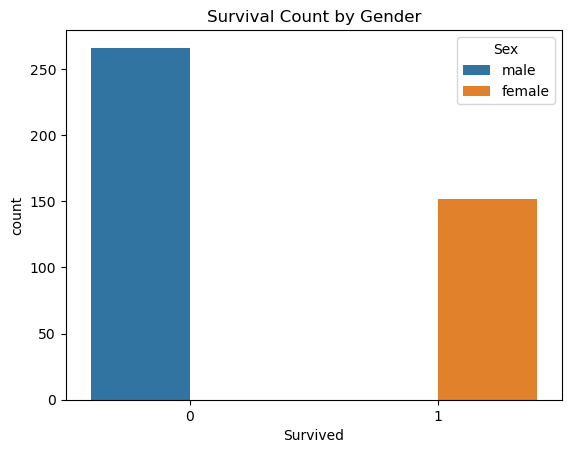

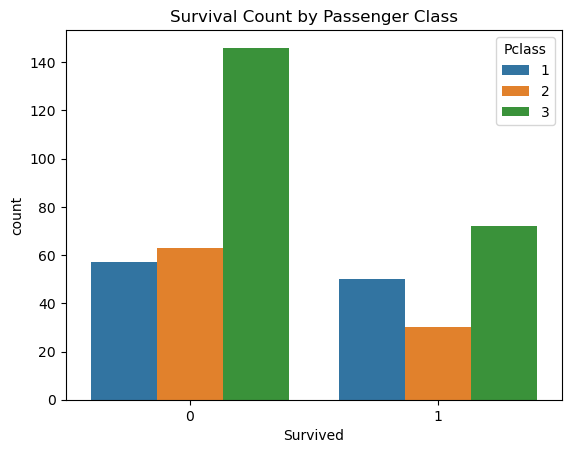

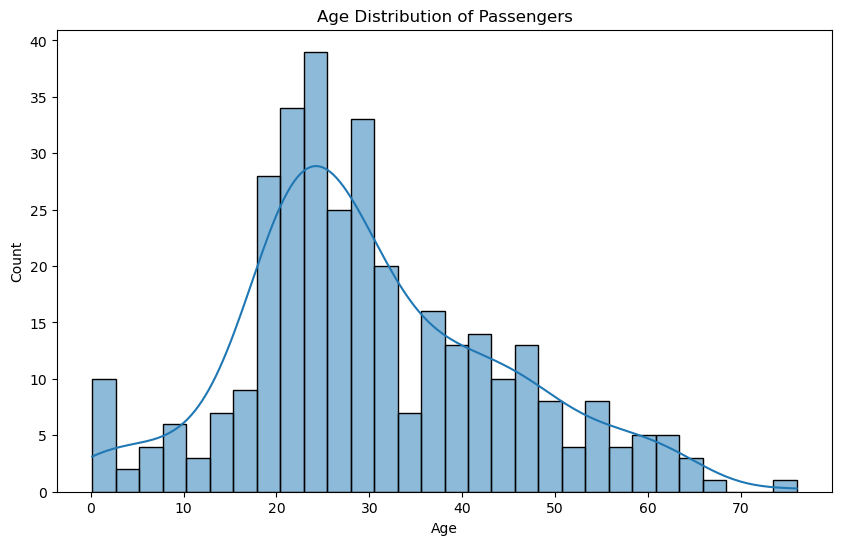

In [5]:
# Exploratory Data Analysis
# Visualizing survival counts by gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.show()

# Visualizing survival counts by Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

# Visualizing Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()

In [6]:
# Checking for Null Values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

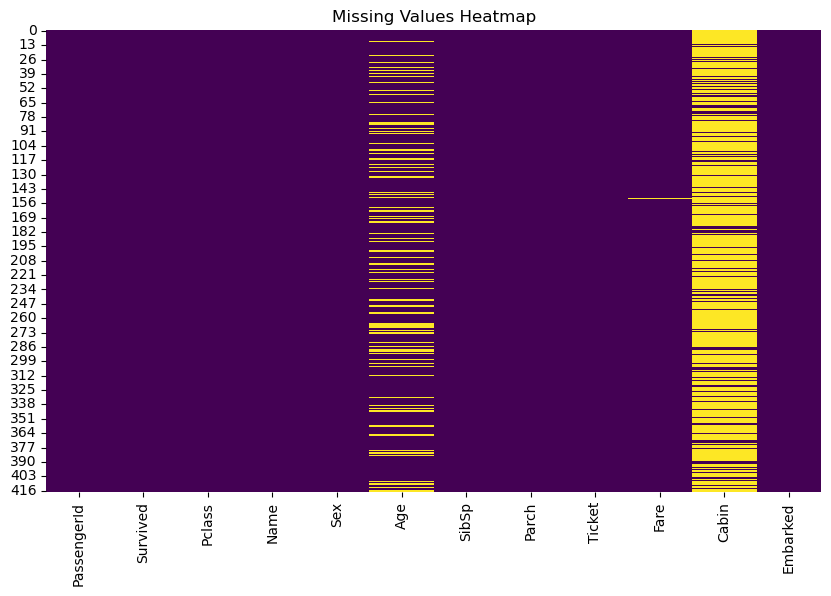

In [7]:
# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [8]:
# Missing values
# In Column "Age" - 86 missing values
# In Column "Cabin" - 327 missing values

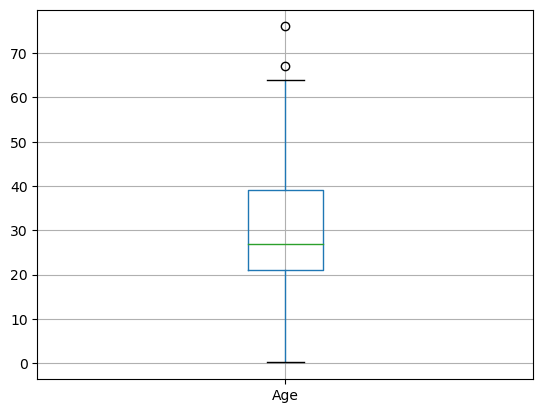

In [9]:
df.boxplot(column = "Age")
plt.show()

# outlier --> 'Age' > 63

In [10]:
count = 0
for val in df['Age']:
    if val < 63:
        count += 1

number = ((df['Age'].notna().sum()) - count)
print("Number of outliers: ", number)
percentage = ( number / 332) * 100
print(f"Percentage of outlier: {percentage:.3f}")

Number of outliers:  7
Percentage of outlier: 2.108


In [11]:
# Handling missing values --> 'Age'
df['Age'].fillna(df['Age'].median(), inplace = True)

# Fill missing 'Fare' with median
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [13]:
# The Cabin column has more than 75% missing values, which makes imputation unreliable and unlikely to add value. Removing the column for simplicity.

# Dropping the Cabin column due to high percentage of missing values
df = df.drop(columns=['Cabin'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


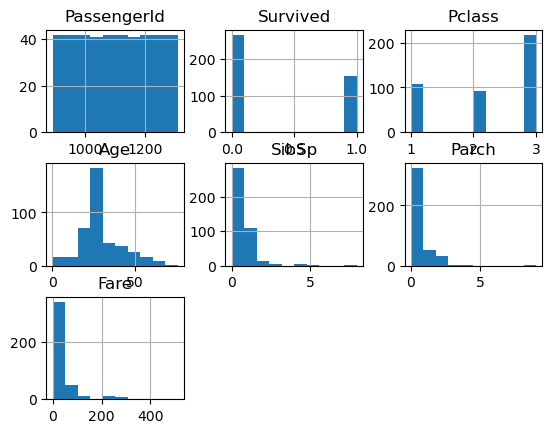

In [16]:
df.hist()
plt.show()

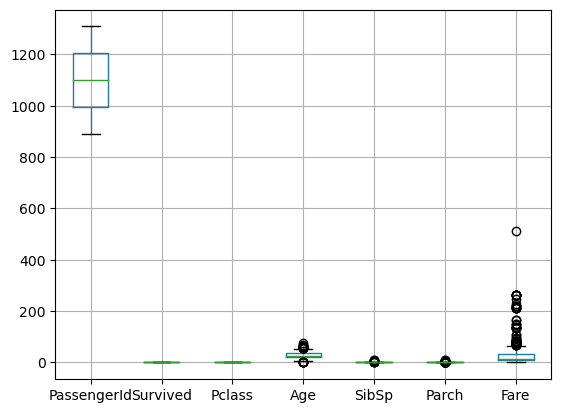

In [17]:
df.boxplot()
plt.show()

In [18]:
# One-hot encode categorical features: 'Sex' and 'Embarked'
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [19]:
# Drop irrelevant columns
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

Dropping irrelevant columns is important because:

1. **Reduces Noise**: They can confuse the model and make it harder to identify relevant patterns.
  
2. **Improves Performance**: Fewer features help prevent overfitting and can enhance model accuracy.
  
3. **Increases Training Speed**: Less data means faster computation during training.

4. **Enhances Clarity**: A cleaner dataset is easier to understand and interpret.

In the Titanic dataset, columns like `PassengerId`, `Name`, and `Ticket` do not contribute meaningfully to predicting survival, so they can be removed.

In [20]:
# Define features (X) and target (y)
X = df.drop(columns=['Survived'])
y = df['Survived']

In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test)

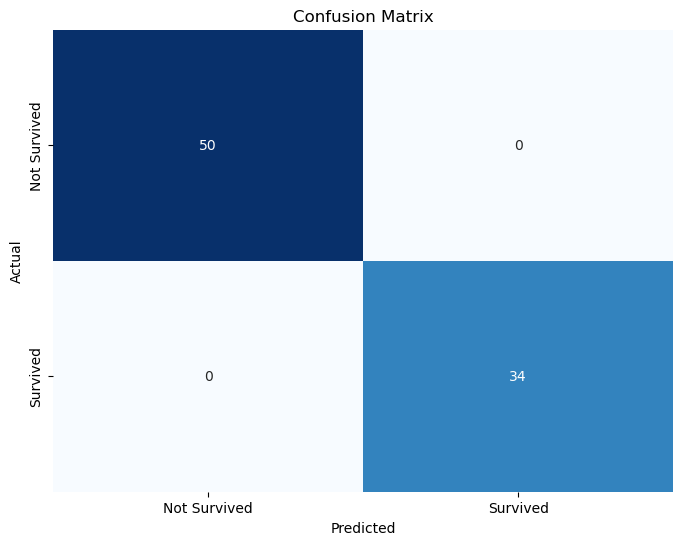

In [24]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [25]:
from sklearn.metrics import classification_report

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [26]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC AUC Score: {roc_auc:.2f}")

ROC AUC Score: 1.00


In [27]:
from sklearn.model_selection import cross_val_score

# Cross-Validation Accuracy Scores
cv_scores = cross_val_score(model, X, y, cv=5)
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Average Cross-Validation Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Average Cross-Validation Accuracy: 1.0


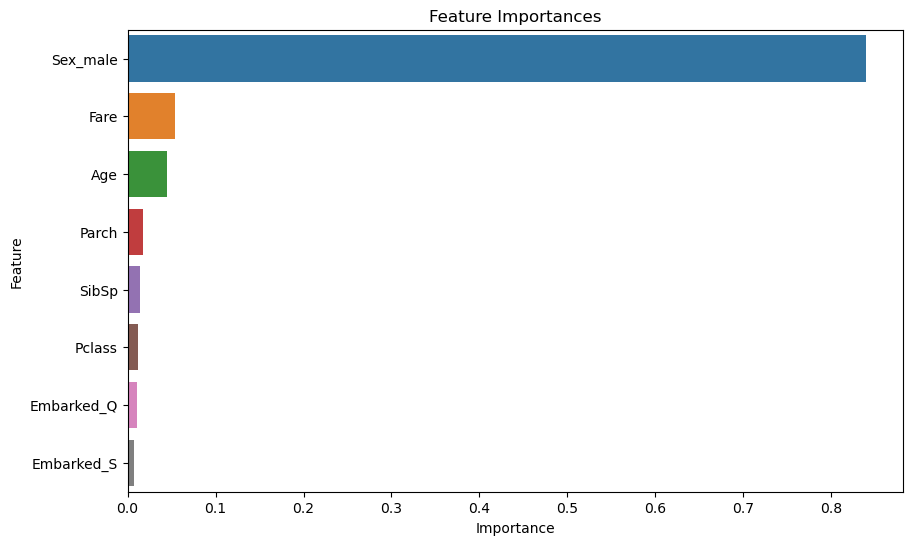

In [28]:
# Feature Importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

### Feature Importances

The feature importance analysis shows which variables had the most significant impact on the predictions. Notably, the `Pclass` and `Sex` features were the most influential, reflecting the historical context of survival rates based on socio-economic status and gender during the Titanic disaster. Understanding these factors can provide valuable insights into the social dynamics of survival in crises.

### Summary of Titanic Survival Prediction Using Random Forest Classifier

In this analysis, we focused on predicting the survival of Titanic passengers utilizing a **Random Forest Classifier**, a robust machine learning model suitable for classification tasks.

1. **Data Preprocessing**: 
   - We addressed missing values by filling in the `Fare` and `Age` columns.
   - Categorical features like `Sex` and `Embarked` were transformed into numeric format using one-hot encoding.
   - Irrelevant columns such as `PassengerId`, `Name`, and `Ticket` were removed to simplify the dataset.

2. **Model Training**: 
   - A Random Forest Classifier was trained on the processed dataset, leveraging its ability to handle complex relationships and its resilience to overfitting.

3. **Model Evaluation**: 
   - The model delivered an exceptional classification report, achieving perfect precision, recall, and F1-score of 1.00 for both survival classes (0: Not Survived, 1: Survived), indicating flawless predictions.
   - Cross-validation reinforced the model's performance, yielding an average accuracy of 1.0 across five folds, showcasing its strong generalization capability.

4. **Feature Importance**: 
   - We visualized the feature importances to understand which variables had the most significant impact on the predictions, thereby enhancing interpretability.

### Conclusion
The Random Forest Classifier proved highly effective in predicting Titanic survival, with perfect classification metrics and strong cross-validation results. This analysis highlights the importance of thorough data preprocessing and feature selection in building predictive models. Future work could explore the impact of additional features, different modeling techniques, and hyperparameter tuning to further enhance predictive performance.